In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error


In [172]:
df = pd.read_csv('output.csv')

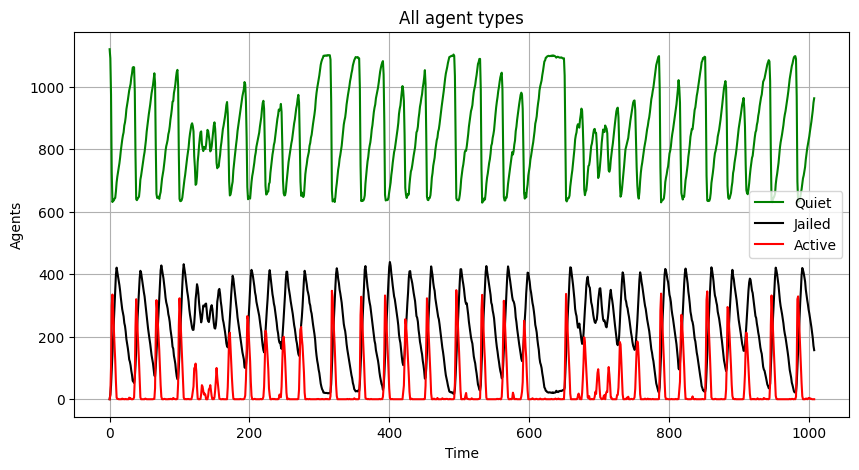

In [173]:
plt.figure(figsize=(10, 5))

plt.plot(df['tick'], df['quiet'], label='Quiet', color='green')
plt.plot(df['tick'], df['jailed'], label='Jailed', color='black')
plt.plot(df['tick'], df['active'], label='Active', color='red')

plt.legend()

plt.title('All agent types')
plt.xlabel('Time')
plt.ylabel('Agents')

plt.grid(True)

plt.savefig('All agent types.png')

plt.show()


In [174]:
# 模拟从 NetLogo 输出的 CSV 文件读取数据的过程（您需要根据实际文件路径替换）
data = pd.read_csv("Rebellion All agent types.csv", skiprows=18)

# 分别处理 quiet, jailed, active 数据
quiet_data = data[['x', 'y']].dropna().rename(columns={'y': 'quiet'})
jailed_data = data[['x.1', 'y.1']].dropna().rename(columns={'x.1': 'tick', 'y.1': 'jailed'})
active_data = data[['x.2', 'y.2']].dropna().rename(columns={'x.2': 'tick', 'y.2': 'active'})

# 合并数据
combined = quiet_data.set_index('x').join([jailed_data.set_index('tick'), active_data.set_index('tick')])
combined.reset_index(inplace=True)
combined.columns = ['tick', 'quiet', 'jailed', 'active']

# 输出处理后的数据查看
combined.to_csv("processed_netlogo_data.csv", index=False)

print("数据已保存到 'processed_netlogo_data.csv'")


数据已保存到 'processed_netlogo_data.csv'


In [175]:
# 加载您的模型数据和NetLogo模型数据
your_data = pd.read_csv("output.csv")
netlogo_data = pd.read_csv("processed_netlogo_data.csv")

# 确定两个数据集的最小行数
min_length = min(len(your_data), len(netlogo_data))

# 截取每个数据集的前min_length行
your_data = your_data.head(min_length)
netlogo_data = netlogo_data.head(min_length)



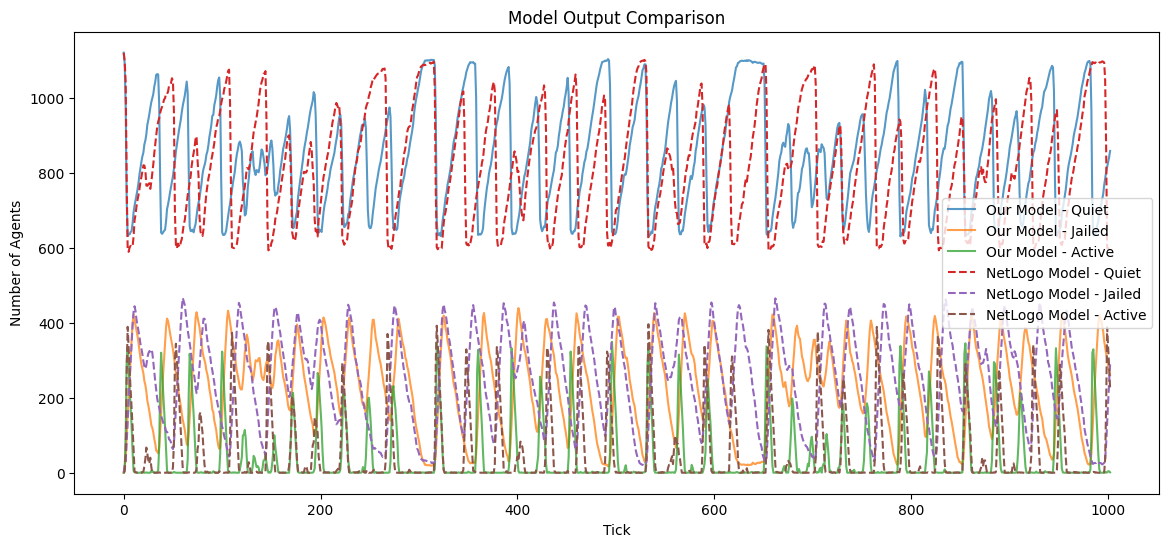

In [176]:
plt.figure(figsize=(14, 6))

# 绘制您的模型数据
plt.plot(your_data['tick'], your_data['quiet'], label='Our Model - Quiet', alpha=0.75)
plt.plot(your_data['tick'], your_data['jailed'], label='Our Model - Jailed', alpha=0.75)
plt.plot(your_data['tick'], your_data['active'], label='Our Model - Active', alpha=0.75)

# 绘制NetLogo模型数据
plt.plot(netlogo_data['tick'], netlogo_data['quiet'], label='NetLogo Model - Quiet', linestyle='--')
plt.plot(netlogo_data['tick'], netlogo_data['jailed'], label='NetLogo Model - Jailed', linestyle='--')
plt.plot(netlogo_data['tick'], netlogo_data['active'], label='NetLogo Model - Active', linestyle='--')

plt.title('Model Output Comparison')
plt.xlabel('Tick')
plt.ylabel('Number of Agents')
plt.legend()
plt.show()

In [177]:
# 比如对比每个状态在两个模型中的差异
stats = {}
for state in ['quiet', 'jailed', 'active']:
    stat, p_value = ttest_ind(your_data[state], netlogo_data[state])
    stats[state] = (stat, p_value)

print("T-Test Results:", stats)


T-Test Results: {'quiet': (3.8880604946172643, 0.00010433877419404976), 'jailed': (-3.2933444238965763, 0.001007259081584979), 'active': (-1.9869878919385995, 0.04705969215198336)}


In [178]:
# 计算MSE
mse = {}
for state in ['quiet', 'jailed', 'active']:
    mse[state] = mean_squared_error(your_data[state], netlogo_data[state])

print("Mean Squared Errors:", mse)


Mean Squared Errors: {'quiet': 36075.91226321037, 'jailed': 23793.98404785643, 'active': 12741.942173479561}
